In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
df.shape

(8807, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
# Check for missing value 

df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
# Fill with placeholder
df['country'] = df['country'].fillna('Unknown')
df['has_director'] = df['director'] != 'Unknown'
df['director'] = df['director'].fillna('Unknown')
df['has_cast'] = df['cast'] != 'Unknown'
df['cast'] = df['cast'].fillna('Unknown')
df['date_added'] = df['date_added'].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna('Unknown')




In [6]:
df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,8807,8807,8807,8807,8807,8807,8807,8807
unique,8807,2,8807,4529,7693,749,1768,17,221,514,8775
top,s1,Movie,Dick Johnson Is Dead,Unknown,Unknown,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,2634,825,2818,109,3211,1793,362,4


In [7]:
df['country'].dropna().unique()[:20]

array(['United States', 'South Africa', 'Unknown', 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States'], dtype=object)

In [9]:
# top 10 most frequent countries

from collections import Counter

country_series = df['country'].dropna().str.split(', ')
all_countries = [country for sublist in country_series for country in sublist]
country_counts = Counter(all_countries)

# Convert to DataFrame
country_df = pd.DataFrame(country_counts.items(), columns=['Country', 'Count'])
country_df = country_df.sort_values(by='Count', ascending=False)

country_df.head(20)


,Country,Count
0,United States,3689
3,India,1046
2,Unknown,831
6,United Kingdom,804
16,Canada,445
13,France,393
17,Japan,318
19,Spain,232
21,South Korea,231
7,Germany,226


In [11]:
# how many Movies vs TV Shows there are:

df['type'].value_counts()


type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [29]:
# Top 5 most common rating

df['rating'].value_counts().head()

rating
TV-MA    3211
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: count, dtype: int64

In [12]:
# Most Common Genre

genre_series = df['listed_in'].str.split(', ')
all_genres = [genre for sublist in genre_series for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts().head(10)
genre_counts


International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

<Axes: xlabel='release_year'>

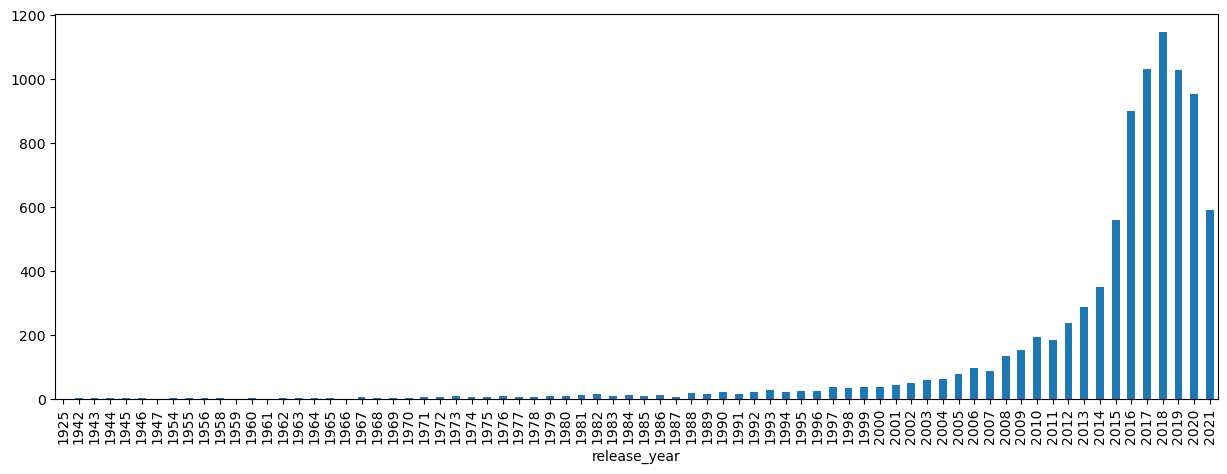

In [13]:
#number of shows released each year:

df['release_year'].value_counts().sort_index().plot(kind='bar', figsize=(15,5))


duration
90 min     152
94 min     146
93 min     146
97 min     146
91 min     144
95 min     137
96 min     130
92 min     129
102 min    122
98 min     120
Name: count, dtype: int64


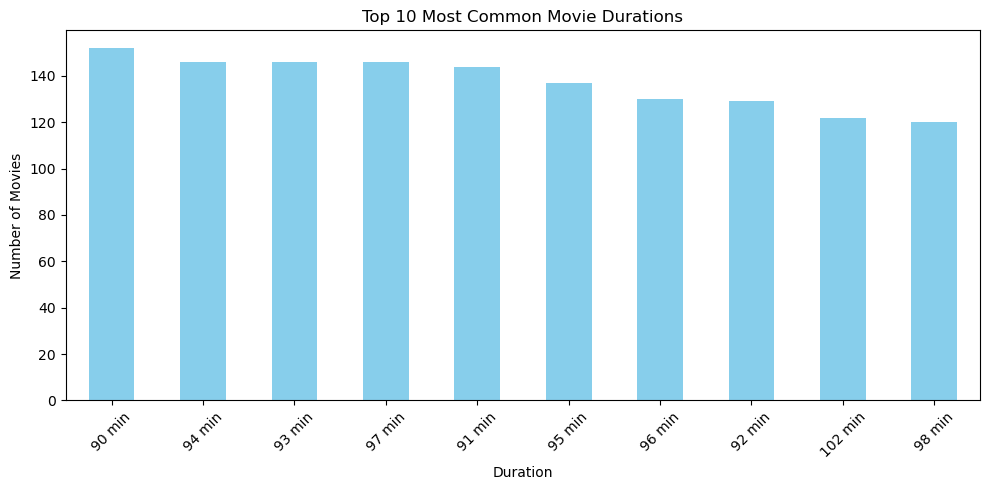

In [26]:
import matplotlib.pyplot as plt

# Get top 10 durations for Movies
movie_duration_counts = df[df['type'] == 'Movie']['duration'].value_counts().head(10)
print(movie_duration_counts)
# Plot
movie_duration_counts.plot(kind='bar', color='skyblue', figsize=(10,5))
plt.title("Top 10 Most Common Movie Durations")
plt.xlabel("Duration")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


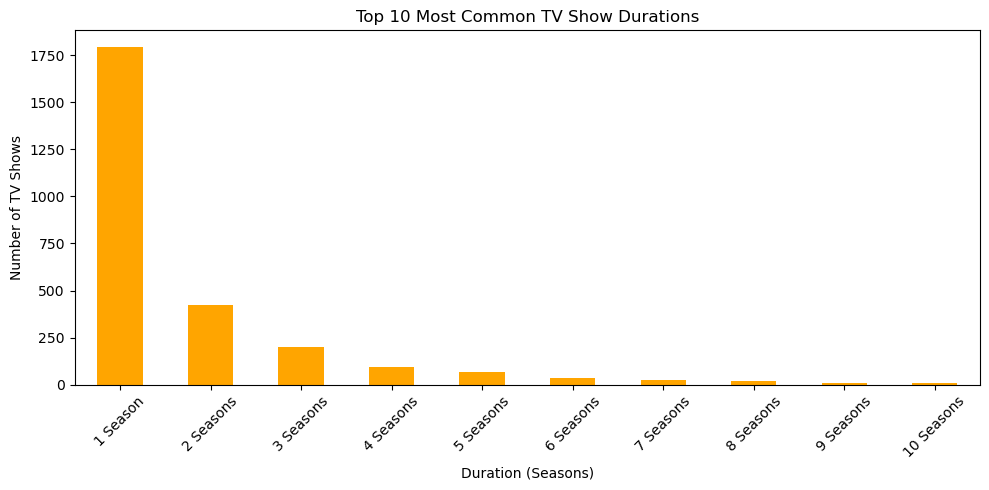

In [30]:
# TV Show Duration Distribution (Number of Seasons)
tv_duration_counts = df[df['type'] == 'TV Show']['duration'].value_counts().head(10)

# Plot
import matplotlib.pyplot as plt

tv_duration_counts.plot(kind='bar', color='orange', figsize=(10,5))
plt.title("Top 10 Most Common TV Show Durations")
plt.xlabel("Duration (Seasons)")
plt.ylabel("Number of TV Shows")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


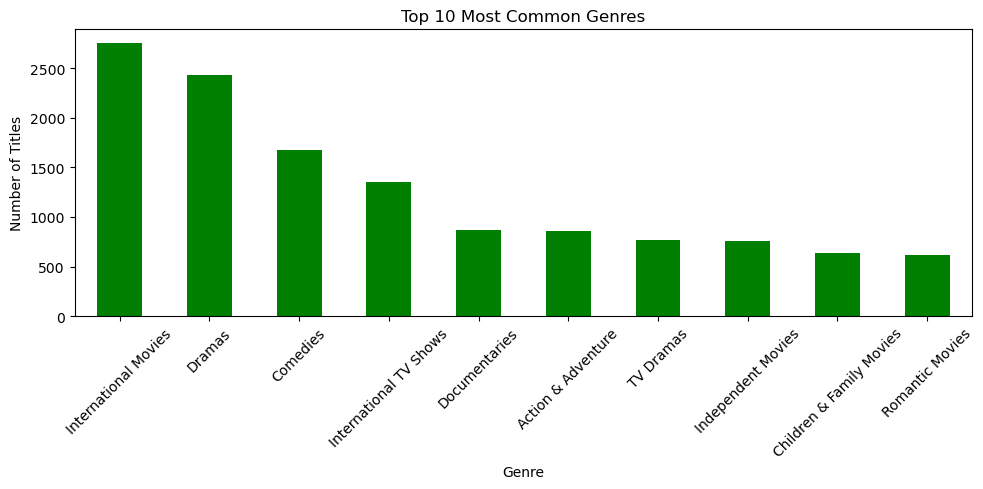

In [31]:
# Top Genres / Categories

genre_series = df['listed_in'].dropna().str.split(', ')
all_genres = [genre for sublist in genre_series for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts().head(10)

# Plot
genre_counts.plot(kind='bar', color='green', figsize=(10,5))
plt.title("Top 10 Most Common Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


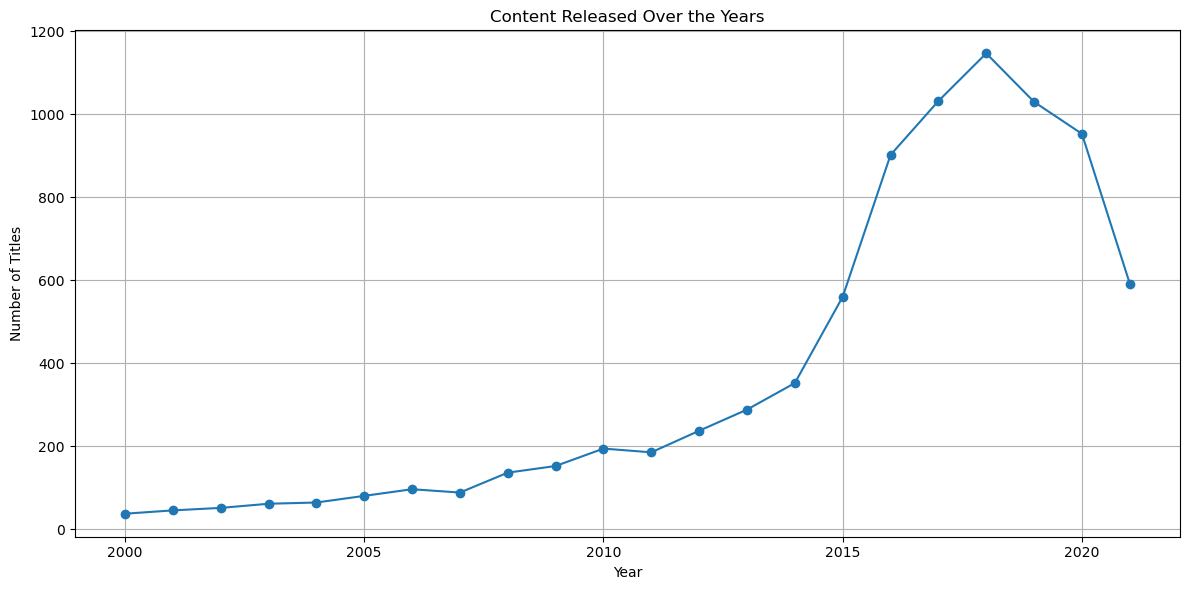

In [40]:
# Content Trend Over the Years after year 2000

release_counts = df['release_year'].value_counts().sort_index()
release_counts1 = release_counts[release_counts.index >= 2000]
release_counts1.plot(kind='line', figsize=(12,6), marker='o')
plt.title("Content Released Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.tight_layout()
plt.show()


🔍 Key Findings & Insights

✅ 1. Content Types

* Netflix hosts more Movies than TV Shows.
* Most common movie durations are around 90 minutes.
* TV shows usually have 1–3 seasons, with 1 season being the most frequent.

✅ 2. Top Genres

The most common genres on Netflix include:

* Dramas
* Comedies
* Documentaries
* Children & Family Movies

Many titles are tagged under multiple genres (e.g., "Comedies, Dramas").

✅ 3. Countries

Though the dataset shows over 700 unique "country" entries, this is due to combinations like "United States, India".
After breaking those down:

* United States is the leading producer.
* Followed by India, United Kingdom, and Canada.

✅ 4. Release Year Trends

* Content production has surged since 2015, likely due to Netflix’s aggressive original content push.
* The year 2019 had the most releases.
* There is a visible dip during 2020–2021, likely due to COVID-19 disruptions.

✅ 5. Missing Data

* director, cast, and country fields have significant missing values.
* Instead of deleting rows, placeholders like "Unknown" were used.
* Flags (has_director, has_cast) were also created to study missingness patterns.

💡 Conclusions:

* Netflix focuses heavily on short-format content — ~90-minute movies and 1-season shows dominate.

* Drama and Comedy rule Netflix's genre space.

* Netflix's library is U.S.-centric, but with increasing global reach (India, UK, etc.).

* 2016–2019 was Netflix’s golden expansion phase, which slowed in 2020–2021.

